## Which are the most dangerous street intersections around the schools in my city?


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
from arcgis.features.use_proximity import create_drive_time_areas
from arcgis.features.analysis import overlay_layers, join_features
gis = GIS("home")

#### Now you are ready to start!

#### Specify the inputs needed to customize your analysis

We are working with the `Schools`, `Streets` and `Crashes` of Washington, DC.

In [2]:
location = 'Washington, DC'

#Itemid for school (place to generate boundary OR boundary), streets (place to classify) and crashes (measure)
school_itemid = 'dd9e882e321e49448e07b38d265770b5'
streets_itemid = '854ee79cbeb94c879c47fd2394c30b59'
crashes_itemid = 'c1c4ec37b5ec4b30821e68ecd4f4aa22'

#Service area inputs
travel_mode = 'Walking'
time = [10]

In [3]:
school_item = gis.content.get(school_itemid)
school_url = school_item.url+'/0'
school_url

'https://services.arcgis.com/bkrWlSKcjUDFDtgw/arcgis/rest/services/DC_SchoolsW/FeatureServer/0'

### 1. Create 10 min walkshed areas around schools that serve as the extent for this analysis

<Item title:"schoolServiceAreas_dd9e882e321e49448e07b38d265770b5" type:Feature Layer Collection owner:mmajumdar_dcdev>
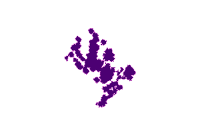

In [4]:
#school_service_areas = create_drive_time_areas(school_url, break_values=time, travel_mode=travel_mode, output_name="schoolServiceAreas_"+school_itemid, overlap_policy='Dissolve')
school_service_areas = gis.content.get('b30dd2e595fc45b1a0a121aea08b15f2')
school_service_areas

### 2. We now fetch `streets` and `crashes` and restrict them to the school walkshed areas using the `Overlay` tool

In [5]:
streets_item = gis.content.get(streets_itemid)
crashes_item = gis.content.get(crashes_itemid)

In [6]:
#Clipping streets by school service areas
#school_streets = overlay_layers(streets_item, school_service_areas, output_type='Input', output_name='Streets clipped by school SA')
school_streets = gis.content.get('7fa677fa8095468fbd8359bf69969791')
school_streets

<Item title:"Streets clipped by school SA" type:Feature Layer Collection owner:mmajumdar_dcdev>

In [7]:
#Clipping crashes by school service areas
#school_crashes = overlay_layers(crashes_item, school_service_areas, output_type='Input', output_name='Crashes clipped by school SA')
school_crashes = gis.content.get('602a02c8fe6a46b5896287eb7a7220bf')
school_crashes

<Item title:"Crashes clipped by school SA" type:Feature Layer Collection owner:mmajumdar_dcdev>

### 3. We now spatially join the `school_crashes` to `school_streets` to get a `JoinCount` (number of crashes reported on each street segment)

<Item title:"Crashes_Along_Streets1" type:Feature Layer Collection owner:mmajumdar_dcdev>
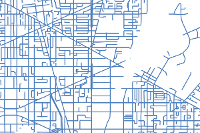

In [8]:
#crashes_along_streets = join_features(school_streets, school_crashes, spatial_relationship='intersects', output_name='Crashes_Along_Streets1')
crashes_along_streets = gis.content.get('f3f59d7ca52c4ecc9178ef79bc75e518')
crashes_along_streets

### 4. We can visualize this layer in the notebook to spot the dangerous streets, based on number of crashes. 

In [12]:
map1 = gis.map(location, zoomlevel=9)

# map the schools with streets having number of crashes within the walkshed
map1.add_layer({"type":"FeatureLayer",
                "url": school_url,
                 "opacity": 0.4})

map1.add_layer({"type":"FeatureLayer",
                "url": crashes_along_streets.url,
                "field_name":"Join_Count",
                "renderer":"ClassedColorRenderer",
                "opacity":0.6
               })

map1

MapView(layout=Layout(height='400px', width='100%'), zoom=9.0)

### To customize symobology of this layer, I stylized it in AGOL to generate the follwoing map

In [11]:
map_item = gis.content.get('daf00315a5aa4f99b52028c869bfef46')
from arcgis.mapping import WebMap
WebMap(map_item)

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

### This analysis could be extended to any applicable `measure-place/boundary-service_area_place` combination. For instance:

1. Most dangerous (crime/crashes) bikelanes around entry/exit-points-of-parks
2. Restaurants with most/severe violations along streets around workplaces
3. Service requests involving health complaints in neighborhoods including factories or industrial facilities